In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TCS.csv" , encoding = "ISO-8859-1")
df.shape

(738, 7)

In [3]:
df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,2084.399902,2093.399902,2074.250000,2080.750000,1955.040649,1530539.0
2018-09-11,2089.000000,2089.000000,2042.199951,2046.250000,1922.625122,3679745.0
2018-09-12,2052.350098,2068.899902,2040.000000,2043.949951,1920.463989,2307661.0
2018-09-14,2044.000000,2071.550049,2018.150024,2065.399902,1940.617920,3642038.0
2018-09-17,2070.000000,2077.800049,2054.550049,2074.149902,1948.838867,1033857.0
...,...,...,...,...,...,...
2021-09-02,3734.000000,3859.149902,3722.000000,3836.750000,3836.750000,3403717.0
2021-09-03,3825.000000,3856.899902,3804.550049,3842.050049,3842.050049,1746812.0
2021-09-06,3849.699951,3877.600098,3814.000000,3852.000000,3852.000000,1723693.0


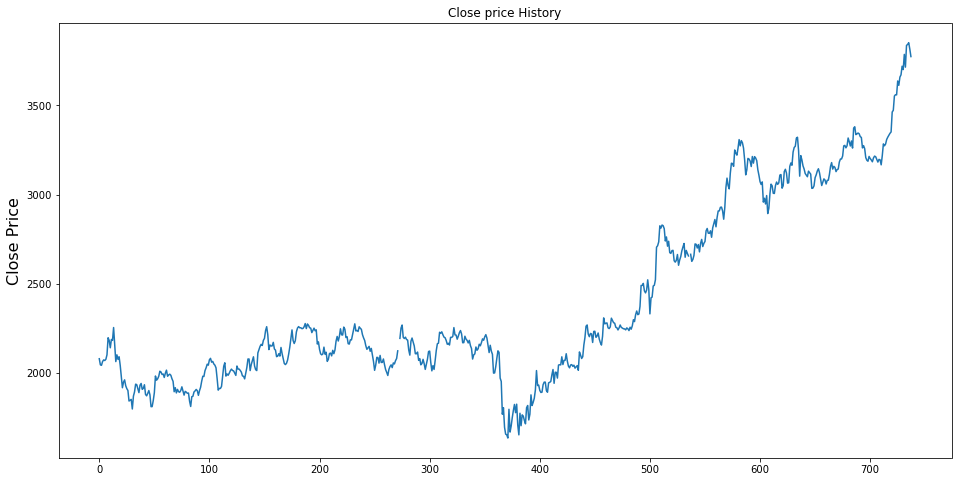

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [5]:
df1 = df.dropna(how="any")

In [6]:
data1 = df1.filter(['Close'])
len(data1)

736

In [7]:
data = data1.values
data

array([[2080.75    ],
       [2046.25    ],
       [2043.949951],
       [2065.399902],
       [2074.149902],
       [2070.75    ],
       [2077.899902],
       [2103.149902],
       [2198.449951],
       [2183.199951],
       [2142.149902],
       [2188.850098],
       [2183.699951],
       [2255.550049],
       [2162.850098],
       [2064.800049],
       [2102.649902],
       [2077.550049],
       [2091.800049],
       [2043.599976],
       [1979.949951],
       [1918.300049],
       [1949.5     ],
       [1962.300049],
       [1929.400024],
       [1913.199951],
       [1903.      ],
       [1843.650024],
       [1848.5     ],
       [1853.      ],
       [1799.099976],
       [1871.      ],
       [1894.800049],
       [1938.150024],
       [1935.75    ],
       [1913.449951],
       [1890.849976],
       [1932.699951],
       [1942.150024],
       [1909.199951],
       [1914.849976],
       [1934.949951],
       [1880.650024],
       [1872.849976],
       [1886.599976],
       [19

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.2005732 ],
       [0.18500215],
       [0.18396406],
       [0.19364517],
       [0.19759435],
       [0.19605986],
       [0.19928686],
       [0.21068306],
       [0.25369529],
       [0.24681243],
       [0.22828512],
       [0.24936254],
       [0.2470381 ],
       [0.27946655],
       [0.23762784],
       [0.19337444],
       [0.21045739],
       [0.19912895],
       [0.20556048],
       [0.1838061 ],
       [0.15507863],
       [0.12725388],
       [0.14133551],
       [0.14711262],
       [0.13226369],
       [0.12495203],
       [0.12034844],
       [0.09356173],
       [0.09575069],
       [0.0977817 ],
       [0.07345474],
       [0.10590573],
       [0.11664752],
       [0.13621287],
       [0.13512966],
       [0.12506487],
       [0.11486471],
       [0.13375306],
       [0.13801821],
       [0.12314669],
       [0.12569675],
       [0.13476857],
       [0.11026112],
       [0.10674068],
       [0.11294654],
       [0.12010018],
       [0.1091779 ],
       [0.079

In [9]:
train_data_len = math.ceil(len(data) * 0.80)
train_data = scaled_data[0:train_data_len, :]

In [10]:
p=130
x_train = []
y_train = []
for i in range(p, len(train_data)):
    x_train.append(train_data[i-p:i, 0])
    y_train.append(train_data[i, 0])
    if i<=p+1:
        print(x_train)
        print(y_train)

[array([0.2005732 , 0.18500215, 0.18396406, 0.19364517, 0.19759435,
       0.19605986, 0.19928686, 0.21068306, 0.25369529, 0.24681243,
       0.22828512, 0.24936254, 0.2470381 , 0.27946655, 0.23762784,
       0.19337444, 0.21045739, 0.19912895, 0.20556048, 0.1838061 ,
       0.15507863, 0.12725388, 0.14133551, 0.14711262, 0.13226369,
       0.12495203, 0.12034844, 0.09356173, 0.09575069, 0.0977817 ,
       0.07345474, 0.10590573, 0.11664752, 0.13621287, 0.13512966,
       0.12506487, 0.11486471, 0.13375306, 0.13801821, 0.12314669,
       0.12569675, 0.13476857, 0.11026112, 0.10674068, 0.11294654,
       0.12010018, 0.1091779 , 0.07927697, 0.07952523, 0.09466748,
       0.11459392, 0.15686144, 0.14632278, 0.14979804, 0.15618444,
       0.16902489, 0.16717443, 0.16083315, 0.16196149, 0.15320564,
       0.16412792, 0.17171036, 0.15627468, 0.15950174, 0.16155533,
       0.15864419, 0.14988828, 0.1433891 , 0.11709885, 0.12734413,
       0.11412   , 0.12303386, 0.11721169, 0.11585768, 0.1202

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(459, 130, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
115/115 [==============================] - 7s 60ms/step - loss: 0.0062
Epoch 2/10
115/115 [==============================] - 7s 60ms/step - loss: 0.0019
Epoch 3/10
115/115 [==============================] - 7s 60ms/step - loss: 0.0015
Epoch 4/10
115/115 [==============================] - 8s 71ms/step - loss: 0.0013
Epoch 5/10
115/115 [==============================] - 7s 59ms/step - loss: 0.0013
Epoch 6/10
115/115 [==============================] - 7s 60ms/step - loss: 0.0012
Epoch 7/10
115/115 [==============================] - 7s 63ms/step - loss: 0.0012
Epoch 8/10
115/115 [==============================] - 7s 63ms/step - loss: 0.0010
Epoch 9/10
115/115 [==============================] - 7s 63ms/step - loss: 8.1746e-04
Epoch 10/10
115/115 [==============================] - 8s 69ms/step - loss: 9.4497e-04


In [14]:
test_data = scaled_data[train_data_len - p: , :]
x_test = []
y_test = data[train_data_len:, :]
for i in range(p, len(test_data)):
    x_test.append(test_data[i-p:i, 0])

In [15]:
x_test = np.array(x_test)
x_test.shape

(147, 130)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
predict

array([[3178.3232],
       [3185.6519],
       [3185.1448],
       [3197.376 ],
       [3201.6104],
       [3211.9744],
       [3219.962 ],
       [3221.08  ],
       [3205.5918],
       [3179.215 ],
       [3145.386 ],
       [3112.711 ],
       [3092.1768],
       [3052.1643],
       [3020.997 ],
       [2992.463 ],
       [2984.4485],
       [2961.1235],
       [2946.1318],
       [2958.62  ],
       [2992.638 ],
       [3025.4685],
       [3039.8884],
       [3043.201 ],
       [3051.8062],
       [3064.6272],
       [3072.1672],
       [3077.6223],
       [3091.801 ],
       [3106.1907],
       [3097.1455],
       [3084.7869],
       [3094.0251],
       [3112.3618],
       [3124.6135],
       [3117.1516],
       [3104.456 ],
       [3116.271 ],
       [3139.39  ],
       [3158.454 ],
       [3191.239 ],
       [3227.902 ],
       [3258.894 ],
       [3292.1877],
       [3318.7104],
       [3314.9197],
       [3261.7612],
       [3233.57  ],
       [3213.714 ],
       [3193.7373],


In [18]:
rmse = np.sqrt(np.mean(predict - y_test)**2)
rmse

7.49680788531038

<ipython-input-19-fc40edb2b829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predict


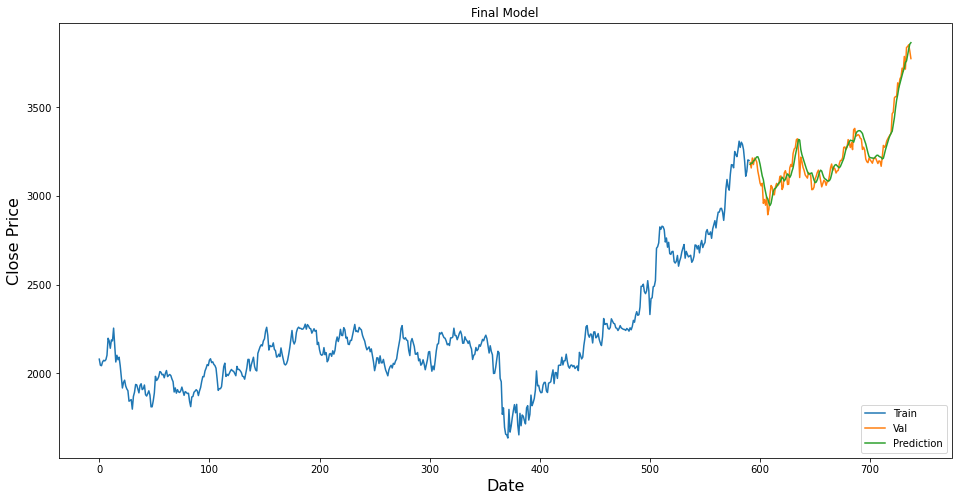

In [19]:
train = data1[:train_data_len]
valid = data1[train_data_len:]
valid['Prediction'] = predict
plt.figure(figsize=(16,8))
plt.title('Final Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [20]:
df2 = pd.read_csv("TCS.csv" , encoding = "ISO-8859-1")
new_df = df2.filter(['Close'])
new_df1 = new_df.dropna(how="any")
new_df2 = new_df1.values
data2_len = 342
data2 = new_df2[0:data2_len, :]
data2.shape

(342, 1)

In [21]:
last_days = data2[-p:]
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2110.896]]


In [22]:
x_input = test_data[147:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = p
i=0
num = int(input())
while(i<num):
    
    if(len(temp_input)>p):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

20
[[0.9988099932670593], [1.000351071357727], [1.004408359527588], [1.0096920728683472], [1.0157244205474854], [1.0223067998886108], [1.0293397903442383], [1.0367571115493774], [1.044502854347229], [1.0525261163711548], [1.0607788562774658], [1.0692182779312134], [1.0778065919876099], [1.086512804031372], [1.0953123569488525], [1.104185938835144], [1.1131207942962646], [1.122107982635498], [1.13114333152771], [1.1402251720428467]]


In [23]:
output = scaler.inverse_transform(lst_output)
output

array([[3849.36336155],
       [3852.77785126],
       [3861.76738189],
       [3873.47424148],
       [3886.83981276],
       [3901.42406171],
       [3917.00670718],
       [3933.44089509],
       [3950.6027503 ],
       [3968.379491  ],
       [3986.66467437],
       [4005.36347916],
       [4024.3921774 ],
       [4043.68209633],
       [4063.17882596],
       [4082.83957788],
       [4102.6360906 ],
       [4122.54855466],
       [4142.56772565],
       [4162.6899058 ]])

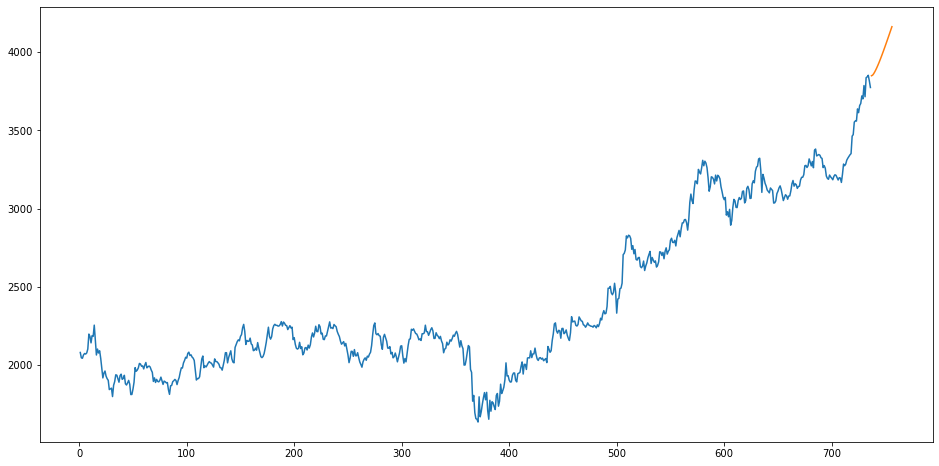

In [24]:
day_new = np.arange(1,737)
day_pred = np.arange(737,737+20)
plt.figure(figsize=(16,8))
plt.plot(day_new,data1[['Close']])
plt.plot(day_pred,output)
plt.show()

In [25]:
y = test_data[147:].reshape(1,-1)
temp1 = list(y)
temp1 = temp1[0].tolist()
lst1 = []
n1 = p
j=0
num = 10
while(j<num):
    
    if(len(temp1)>p):
        y=np.array(temp1[1:])
        y=y.reshape(1,-1)
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        temp1=temp1[1:]
        lst1.extend(yhat1.tolist())
        j=j+1
    else:
        y = y.reshape((1, n1,1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        lst1.extend(yhat1.tolist())
        j=j+1
    

print(lst1)

[[0.9988099932670593], [1.000351071357727], [1.004408359527588], [1.0096920728683472], [1.0157244205474854], [1.0223067998886108], [1.0293397903442383], [1.0367571115493774], [1.044502854347229], [1.0525261163711548]]


In [26]:
out = scaler.inverse_transform(lst1)
out

array([[3849.36336155],
       [3852.77785126],
       [3861.76738189],
       [3873.47424148],
       [3886.83981276],
       [3901.42406171],
       [3917.00670718],
       [3933.44089509],
       [3950.6027503 ],
       [3968.379491  ]])

In [27]:
lst2 = out.tolist()
lst2

[[3849.3633615535996],
 [3852.7778512621735],
 [3861.7673818931007],
 [3873.474241483363],
 [3886.839812763422],
 [3901.424061708564],
 [3917.0067071803664],
 [3933.4408950865486],
 [3950.602750302506],
 [3968.379490998376]]

In [28]:
from itertools import chain

In [29]:
lst3 = list(chain.from_iterable(lst2))
lst3

[3849.3633615535996,
 3852.7778512621735,
 3861.7673818931007,
 3873.474241483363,
 3886.839812763422,
 3901.424061708564,
 3917.0067071803664,
 3933.4408950865486,
 3950.602750302506,
 3968.379490998376]

In [30]:
def findmin(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==0 and arr[i]<arr[i+1]:
                ans.append((arr[i],i))
            if i==len(arr)-1 and arr[i-1]> arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] >arr[i] and arr[i]< arr[i+1]:
                ans.append((arr[i],i))
    return ans

mn = findmin(lst3)
print(mn)

[(3849.3633615535996, 0)]


In [31]:
def findmax(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==len(arr)-1 and arr[i-1]<arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] <arr[i] and arr[i]> arr[i+1]:
                ans.append((arr[i],i))
    return ans

mx = findmax(lst3)
print(mx)

[(3968.379490998376, 9)]


In [32]:
def maxprofit(mn,mx):
    profit =[]
    for x,i in mn:
        for y,j in mx:
            if y-x>0 and j>i:
                profit.append((i,j,y-x))
    return profit

profit = maxprofit(mn,mx)
print(profit)

[(0, 9, 119.0161294447762)]


In [33]:
def finalProfit(profit):
    mx = -1
    px,py,pro = 0,0,0
    for x,y,p in profit:
        if p>=mx:
            px,py,pro =x,y,p
            mx =p 
    return (px,py,pro)
    
print(finalProfit(profit))

(0, 9, 119.0161294447762)
